In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [2]:
breast = load_breast_cancer() #importing breast cancer dataset
breast_data = breast.data #loading data
breast_data.shape #outputting dimensions of breast cancer dataset

(569, 30)

In [3]:
breast_input = pd.DataFrame(breast_data) #transforming data into a dataframe
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

#Standardizing the parameters so they are all equally weighted during training
scalerStand = StandardScaler()
breast_data = scalerStand.fit_transform(breast_data)
breast_input2 = pd.DataFrame(breast_data) #transforming data into a dataframe
breast_input2.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [5]:
breast_labels = breast.target #loading output
breast_labels.shape

(569,)

In [6]:
labels = np.reshape(breast_labels, (569, 1))
final_breast_data = np.concatenate([breast_data, labels], axis = 1) #adding outputs to dataset
final_breast_data.shape

(569, 31)

In [7]:
breast_dataset = pd.DataFrame(final_breast_data) #transforming final dataset into dataframe
features = breast.feature_names #output feature names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
features_labels = np.append(features, 'label') #adding label header
breast_dataset.columns = features_labels #adding features and label to dataset
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0.0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0.0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0.0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0.0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0.0


In [9]:
#creating matrices for accuracy, precision, and recall
acc_score = []
precision_score = []
recall_score = []

In [10]:
X1 = breast_dataset.iloc[:, range(30)] #input
Y = breast_dataset.iloc[:, 30] #output

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics 
from sklearn.multiclass import OneVsRestClassifier

N = 30 #components
#for loop to iterate through pca with n components
for x in range(N):
    if x <= 1: #PCA does not work when N <= 1
        acc_score.append(0)
        precision_score.append(0)
        recall_score.append(0)
    else:
        #Performing PCA on dataset inputs
        pca = PCA(n_components=x) 
        principalComponents = pca.fit_transform(X1) 
        breast_dataset_pca = pd.DataFrame(data = principalComponents) 
        final_breast_dataset_pca = pd.concat([breast_dataset_pca, breast_dataset[['label']]], axis = 1)
        
        X = final_breast_dataset_pca.iloc[:, range(x)]
        Y = final_breast_dataset_pca.iloc[:, x]
    
        np.random.seed(0)
        #80% data for training, 20% data for testing
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)
    
        #performing svm on the dataset PCA
        model = OneVsRestClassifier(SVC(kernel='poly', C = 1e3, gamma = 0.1))
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
    
        acc = metrics.accuracy_score(Y_pred, Y_test)
        acc_score.append(acc)
        
        pres = metrics.precision_score(Y_pred, Y_test)
        precision_score.append(pres)
    
        recall = metrics.recall_score(Y_pred, Y_test)
        recall_score.append(recall)

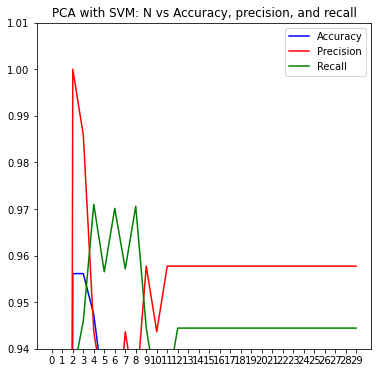

In [12]:
#plot PCA with SVM: N vs Accuracy, precision, and recall
n = np.array(range(N))
fig, ax = plt.subplots(figsize =(6, 6))
plt.title("PCA with SVM: N vs Accuracy, precision, and recall")
plt.xticks(range(N))
plt.plot(n, acc_score, color = 'blue', label = 'Accuracy')
plt.plot(n, precision_score, color = 'red', label = 'Precision')
plt.plot(n, recall_score, color = 'green', label = 'Recall')
plt.legend()
plt.ylim([0.94, 1.01])
plt.show()

In [13]:
#########################################################################################
############################## PROBLEM 2 ################################################
#########################################################################################

In [14]:
housing = pd.DataFrame(pd.read_csv("Housing.csv")) #import housing dataset
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [15]:
#clean up dataset to have 0 and 1 for binary inputs
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
           'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [16]:
#creating matrices for accuracy, precision, and recall
acc_score2 = []
precision_score2 = []
recall_score2 = []

In [17]:
#include only needed inputs
#standardize dataset
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
            'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
            'parking', 'price']
housing_final = housing[num_vars]
housing_final = scalerStand.fit_transform(housing_final)
housing_final = pd.DataFrame(housing_final)
X_housing = housing_final.loc[:, range(10)].values

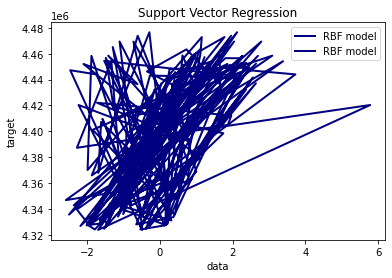

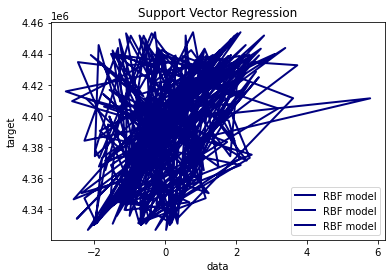

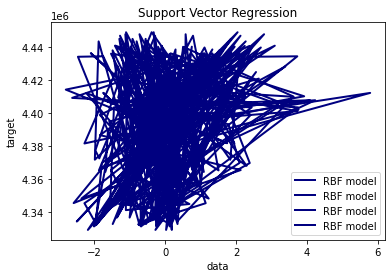

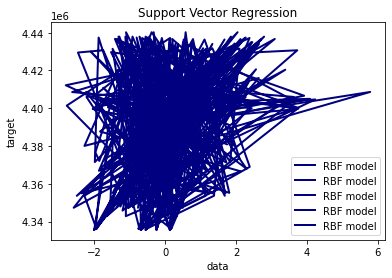

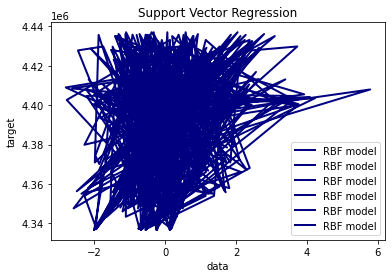

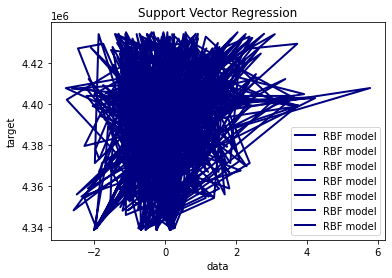

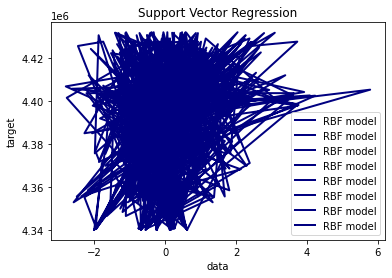

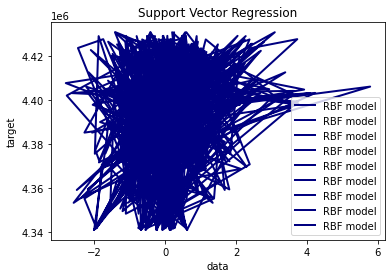

In [18]:
from sklearn.svm import SVR
N2 = 10 #components
#for loop to iterate through pca with n components
for x in range(N2):
    if x <= 1: #PCA does not work when N <= 1
        acc_score2.append(0)
        precision_score2.append(0)
        recall_score2.append(0)
    else:
        #Performing PCA on dataset inputs
        pca = PCA(n_components=x) 
        principalComponents = pca.fit_transform(X_housing) 
        housing_dataset_pca = pd.DataFrame(data = principalComponents) 
        final_housing_dataset = pd.concat([housing_dataset_pca, housing[['price']]], axis = 1)
        
        X2 = final_housing_dataset.iloc[:, range(x)]
        Y2 = final_housing_dataset.iloc[:, x]
    
        np.random.seed(0)
        #80% data for training, 20% data for testing
        X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.20, random_state = 0)
    
        #performing svr on the dataset PCA
        model2 = SVR(kernel='rbf', C=1e3, degree = 2)
        model2.fit(X2_train, Y2_train)
        Y2_pred = model2.predict(X2_test)
    
        lw = 2 
        plt.plot(X2_test, Y2_pred, color='navy', lw=lw, label='RBF model') 
        plt.xlabel('data') 
        plt.ylabel('target') 
        plt.title('Support Vector Regression') 
        plt.legend() 
        plt.show() 